In [92]:
import pandas as pd
import numpy as np

In [93]:
df= pd.read_csv("C:/Users/Kal Aana/Downloads/Mean Temperature Data.csv")
df.head()

,States,Period,1901,1902,1903,1904,1905,1906,1907,1908,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Andaman and Nicobar,Jan,27.68,26.75,26.70,26.02,26.12,27.62,26.78,26.40,...,26.53,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56
1,Andaman and Nicobar,Feb,28.50,26.67,27.54,26.49,27.29,27.40,26.92,26.29,...,26.87,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14
2,Andaman and Nicobar,Mar,27.03,28.09,27.66,27.55,27.89,26.88,27.04,27.59,...,26.39,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90
3,Andaman and Nicobar,Apr,28.52,29.35,29.53,27.72,28.79,29.62,28.75,29.23,...,27.94,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96
4,Andaman and Nicobar,May,28.28,28.25,29.10,28.02,27.80,29.67,27.42,27.70,...,27.81,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28


In [94]:
df.shape

(595, 122)

In [95]:
df.Period.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Annual', 'Winter', 'Summer', 'Monsoon',
       'Post Monsoon'], dtype=object)

In [96]:
df.isnull().sum()

States    0
Period    0
1901      0
1902      0
1903      0
         ..
2016      0
2017      0
2018      0
2019      0
2020      0
Length: 122, dtype: int64

In [97]:
df4=df.copy()


In [98]:
df4=df.copy()
df4.drop(df4.columns[2:52],axis=1,inplace=True)
df4.head()

,States,Period,1951,1952,1953,1954,1955,1956,1957,1958,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Andaman and Nicobar,Jan,25.69,26.45,25.95,26.35,25.49,24.81,25.51,26.80,...,26.53,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56
1,Andaman and Nicobar,Feb,25.30,26.94,25.87,26.31,25.73,25.63,25.65,26.49,...,26.87,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14
2,Andaman and Nicobar,Mar,26.82,26.93,26.93,27.08,26.78,26.82,26.63,27.50,...,26.39,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90
3,Andaman and Nicobar,Apr,27.99,27.96,28.10,28.44,27.89,27.54,28.38,28.78,...,27.94,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96
4,Andaman and Nicobar,May,28.12,28.24,27.74,27.52,27.57,27.03,29.14,28.86,...,27.81,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28


In [99]:
# Function for zonal-classification of states
def zones(state):
    if state in ['Chandigarh','Delhi','Haryana','Himachal Pradesh','Punjab','Rajasthan']: return 'North'
    elif state in ['Bihar', 'Orissa', 'Jharkhand', 'West Bengal']: return 'East'
    elif state in ['Dadra and Nagar Haveli','Daman and Diu','Goa','Gujarat','Maharashtra']: return 'West'
    elif state in ['Andhra Pradesh','Karnataka','Kerala','Puducherry','Tamil Nadu','Andaman and Nicobar','Lakshadweep']: return 'South'
    elif state in ['Chhattisgarh','Madhya Pradesh','Uttarakhand','Uttar Pradesh']: return 'Central'
    elif state in ['Assam','Sikkim','Nagaland','Meghalaya','Manipur','Mizoram','Tripura','Arunachal Pradesh']: return 'North East'
    else: return None

In [67]:
#creating a copy of data
df1=df4.copy()

#Calculate basline mean relative to the period 1961-1990
df1['Baseline mean']= df1.iloc[:,20:40].mean(axis=1).round(2)

#Temp. Change relative to the baseline mean

df1= df1.melt(id_vars= ['States', 'Period', 'Baseline mean'], var_name= 'Year', value_name= 'temp_change')
df1['Year']= df1['Year'].astype(int)
df1['Zone']= df1['States'].apply(zones)
df1['temp_change']= df1['temp_change']-df1['Baseline mean']
df1= df1[['States', 'Zone', 'Period', 'Year', 'temp_change', 'Baseline mean']]

In [68]:
df1

,States,Zone,Period,Year,temp_change,Baseline mean
0,Andaman and Nicobar,South,Jan,1951,-0.05,25.74
1,Andaman and Nicobar,South,Feb,1951,-0.67,25.97
2,Andaman and Nicobar,South,Mar,1951,-0.11,26.93
3,Andaman and Nicobar,South,Apr,1951,-0.11,28.10
4,Andaman and Nicobar,South,May,1951,0.45,27.67
...,...,...,...,...,...,...
41645,West Bengal,East,Annual,2020,-0.06,25.57
41646,West Bengal,East,Winter,2020,-0.60,19.63
41647,West Bengal,East,Summer,2020,-0.57,28.13
41648,West Bengal,East,Monsoon,2020,0.47,28.55


In [54]:
df2=df4.copy()
df2['Baseline mean']= df2.iloc[:,2:72].mean(axis=1).round(2)
df2

,States,Period,1951,1952,1953,1954,1955,1956,1957,1958,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Baseline mean
0,Andaman and Nicobar,Jan,25.69,26.45,25.95,26.35,25.49,24.81,25.51,26.80,...,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56,26.15
1,Andaman and Nicobar,Feb,25.30,26.94,25.87,26.31,25.73,25.63,25.65,26.49,...,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14,26.35
2,Andaman and Nicobar,Mar,26.82,26.93,26.93,27.08,26.78,26.82,26.63,27.50,...,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90,27.16
3,Andaman and Nicobar,Apr,27.99,27.96,28.10,28.44,27.89,27.54,28.38,28.78,...,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96,28.27
4,Andaman and Nicobar,May,28.12,28.24,27.74,27.52,27.57,27.03,29.14,28.86,...,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28,27.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,West Bengal,Annual,25.68,25.55,25.78,25.55,25.50,25.39,25.72,26.36,...,25.62,25.47,25.73,25.61,26.07,25.82,25.42,25.73,25.51,25.72
591,West Bengal,Winter,19.39,20.72,19.86,19.99,19.31,19.19,19.38,20.63,...,18.89,19.43,19.80,20.07,19.88,20.36,19.56,19.94,19.03,19.83
592,West Bengal,Summer,28.17,27.56,29.05,29.25,28.61,28.59,28.61,29.17,...,28.48,28.13,28.66,27.89,28.56,27.68,27.62,28.05,27.56,28.35
593,West Bengal,Monsoon,28.73,28.55,28.42,28.34,28.41,28.05,28.95,29.22,...,28.95,28.83,28.78,28.78,29.00,28.89,29.07,29.17,29.02,28.70


In [100]:
df4.head()

,States,Period,1951,1952,1953,1954,1955,1956,1957,1958,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Andaman and Nicobar,Jan,25.69,26.45,25.95,26.35,25.49,24.81,25.51,26.80,...,26.53,26.78,26.83,25.88,26.29,26.80,26.95,26.79,27.30,27.56
1,Andaman and Nicobar,Feb,25.30,26.94,25.87,26.31,25.73,25.63,25.65,26.49,...,26.87,27.00,27.73,26.46,26.75,26.86,26.83,26.61,27.48,27.14
2,Andaman and Nicobar,Mar,26.82,26.93,26.93,27.08,26.78,26.82,26.63,27.50,...,26.39,27.53,27.84,27.54,27.86,28.29,27.78,27.63,27.88,27.90
3,Andaman and Nicobar,Apr,27.99,27.96,28.10,28.44,27.89,27.54,28.38,28.78,...,27.94,28.48,28.73,28.98,28.39,29.74,28.31,28.18,29.39,28.96
4,Andaman and Nicobar,May,28.12,28.24,27.74,27.52,27.57,27.03,29.14,28.86,...,27.81,27.94,28.40,28.74,28.78,28.60,28.39,27.74,29.06,29.28


In [101]:
#creating a copy of data
df2=df4.copy()

#Calculate basline mean relative to the period 1961-1990
df2['Baseline mean']= df2.iloc[:,2:72].mean(axis=1).round(2)

#Temp. Change relative to the baseline mean

df2= df2.melt(id_vars= ['States', 'Period', 'Baseline mean'], var_name= 'Year', value_name= 'temp_change')
df2['Year']= df2['Year'].astype(int)
df2['Zone']= df2['States'].apply(zones)
df2['temp_change']= df2['temp_change']-df2['Baseline mean']
df2= df2[['States', 'Zone', 'Period', 'Year', 'temp_change', 'Baseline mean']]

In [102]:
df2

,States,Zone,Period,Year,temp_change,Baseline mean
0,Andaman and Nicobar,South,Jan,1951,-0.46,26.15
1,Andaman and Nicobar,South,Feb,1951,-1.05,26.35
2,Andaman and Nicobar,South,Mar,1951,-0.34,27.16
3,Andaman and Nicobar,South,Apr,1951,-0.28,28.27
4,Andaman and Nicobar,South,May,1951,0.22,27.90
...,...,...,...,...,...,...
41645,West Bengal,East,Annual,2020,-0.21,25.72
41646,West Bengal,East,Winter,2020,-0.80,19.83
41647,West Bengal,East,Summer,2020,-0.79,28.35
41648,West Bengal,East,Monsoon,2020,0.32,28.70


In [103]:
df2['temp_change'].describe()

count    41650.000000
mean         0.000135
std          0.688095
min         -3.580000
25%         -0.410000
50%         -0.010000
75%          0.420000
max          3.850000
Name: temp_change, dtype: float64

<AxesSubplot:ylabel='Frequency'>

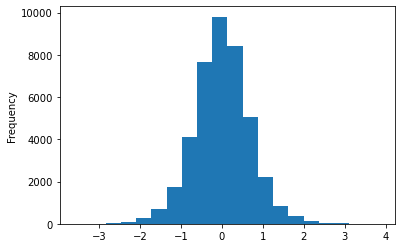

In [85]:
df2['temp_change'].plot(kind='hist',bins=20)

In [108]:
df2.shape

(41650, 6)

In [110]:
df2.States.nunique()

35

In [107]:
# Get data of Rajasthan
df2[df2['States']=='Rajasthan']


,States,Zone,Period,Year,temp_change,Baseline mean
476,Rajasthan,North,Jan,1951,-0.82,15.62
477,Rajasthan,North,Feb,1951,-1.22,18.65
478,Rajasthan,North,Mar,1951,-0.66,24.31
479,Rajasthan,North,Apr,1951,-2.30,29.79
480,Rajasthan,North,May,1951,-0.25,33.38
...,...,...,...,...,...,...
41543,Rajasthan,North,Annual,2020,0.25,25.83
41544,Rajasthan,North,Winter,2020,-0.03,17.14
41545,Rajasthan,North,Summer,2020,-0.17,29.16
41546,Rajasthan,North,Monsoon,2020,0.72,30.57


In [111]:
#save the data
df2.to_csv('C:/Users/Kal Aana/Downloads/Temperature_data_final.csv', index=False)

In [120]:
# open the data
df2= pd.read_csv('C:/Users/Kal Aana/Downloads/Temperature_data_final.csv')

In [121]:
df2.head()

,States,Zone,Period,Year,temp_change,Baseline mean
0,Andaman and Nicobar,South,Jan,1951,-0.46,26.15
1,Andaman and Nicobar,South,Feb,1951,-1.05,26.35
2,Andaman and Nicobar,South,Mar,1951,-0.34,27.16
3,Andaman and Nicobar,South,Apr,1951,-0.28,28.27
4,Andaman and Nicobar,South,May,1951,0.22,27.90


In [113]:
# Which states have seen the highest temperature increase in the last 10 years?
# Which states have seen the lowest temperature increase in the last 10 years?
# What is the average temperature increase in the last 10 years?
# What is the correct order of temperature increase in the last 10 years?
# What is correct order Zone-wise temperature change in the last decade (2011-2020)


In [123]:
# Which ten states/UTs suffered the most from temperature change in the last ten years?

df_c= df2[ (df2.Period=='Annual') & (df2.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nlargest(10, 'temp_change')
df_c.reset_index(inplace=True)

In [124]:
df_c.head(10)

,States,temp_change
0,Lakshadweep,0.64
1,Kerala,0.58
2,Tamil Nadu,0.58
3,Puducherry,0.57
4,Andaman and Nicobar,0.54
5,Himachal Pradesh,0.52
6,Karnataka,0.51
7,Uttarakhand,0.50
8,Chandigarh,0.49
9,Delhi,0.48


In [127]:
df_c.States

0         Lakshadweep
1         Uttarakhand
2    Himachal Pradesh
3          Chandigarh
4               Delhi
5              Kerala
6          Puducherry
7          Tamil Nadu
8             Haryana
9       Uttar Pradesh
Name: States, dtype: object

In [125]:
# Which ten states/UTs suffered the most from temperature change in the last ten years?

df_c= df2[ (df2.Period=='Annual') & (df2.Year.between(2001,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nlargest(10, 'temp_change')
df_c.reset_index(inplace=True)

In [126]:
df_c.head(10)

,States,temp_change
0,Lakshadweep,0.52
1,Uttarakhand,0.51
2,Himachal Pradesh,0.50
3,Chandigarh,0.48
4,Delhi,0.48
5,Kerala,0.47
6,Puducherry,0.47
7,Tamil Nadu,0.47
8,Haryana,0.45
9,Uttar Pradesh,0.45


In [116]:
# Which ten states/UTs suffered the least from temperature change in the last ten years?

df_c= df2[ (df2.Period=='Annual') & (df2.Year.between(2011,2020)) ][['States', 'temp_change']]
df_c= df_c.groupby('States').mean().round(2).nsmallest(10, 'temp_change')
df_c.reset_index(inplace=True)

In [117]:
df_c.head()

,States,temp_change
0,Tripura,-0.03
1,Jharkhand,-0.02
2,West Bengal,-0.02
3,Mizoram,0.00
4,Meghalaya,0.03


In [118]:
# Zone-wise temperature change in the last decade (2011-2020)
df_c=df2[ (df2.Year>2010) & (df2.Period=='Annual')].groupby('Zone').mean().round(2).sort_values('temp_change',ascending=False)
df_c.head()

,Year,temp_change,Baseline mean
Zone,,,
South,2015.5,0.55,27.11
North,2015.5,0.46,22.26
West,2015.5,0.40,26.66
Central,2015.5,0.34,22.74
North East,2015.5,0.17,19.05


In [119]:
# get winter temperature change in the last decade (2011-2020)
df_c=df2[ (df2.Year>2010) & (df2.Period=='Winter')].groupby('Zone').mean().round(2).sort_values('temp_change',ascending=False)
df_c.head()


,Year,temp_change,Baseline mean
Zone,,,
South,2015.5,0.57,25.64
North,2015.5,0.36,12.88
West,2015.5,0.35,22.91
Central,2015.5,0.21,15.68
North East,2015.5,0.14,13.23
